#Kaggle Practice - Housing Price Prediction

Goal: Predict sale price for each house for each id in test set. Format


Evaluation: Based on the Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price.

**Import Library and Load Dataset**

In [51]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

In [52]:
# import data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
!jar -xvf '/content/drive/My Drive/house-prices-advanced-regression-techniques.zip'

 inflated: data_description.txt
 inflated: sample_submission.csv
 inflated: test.csv
 inflated: train.csv


In [54]:
!unzip -n '/content/drive/My Drive/house-prices-advanced-regression-techniques.zip'

Archive:  /content/drive/My Drive/house-prices-advanced-regression-techniques.zip


In [55]:
# create training and test sets
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [56]:
# check training dataset
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
# check the data type for each variable in the set
print(train.dtypes)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [58]:
train.dtypes[train.dtypes == 'object']

MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
PoolQC           object
Fence            object
MiscFeature      object
SaleType        

# Cleaning the Dataset

After looking at the dataset, there are some columns containing NaNs and column containing "object" type. Let's look into what the object types are!

In [59]:
print(train['SaleType'].unique())

['WD' 'New' 'COD' 'ConLD' 'ConLI' 'CWD' 'ConLw' 'Con' 'Oth']


These objects are strings and we can convert them into int or float in order to label them.

In [60]:
# variables of object type
# they are categorical data that can be matched to a label for easier processing

from sklearn.preprocessing import LabelEncoder

objList = train.select_dtypes(include = "object").columns
print(objList)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [61]:
#for feat in objList:
#  le = LabelEncoder()
#  train[feat] = le.fit_transform(train[feat].astype(str))

In [62]:
# convert string labels into value using label encoder
for i in range(train.shape[1]):
    if train[train.columns[i]].dtypes == object:
        lbl = LabelEncoder()
        lbl.fit(list(train[train.columns[i]].values) + list(test[test.columns[i]].values))
        train[train.columns[i]] = lbl.transform(list(train[train.columns[i]].values))
        test[train.columns[i]] = lbl.transform(list(test[test.columns[i]].values))

In [63]:
# check training set after label encoder
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [64]:
# check testing set after label encoder
test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,2,3,3,0,...,120,0,3,2,4,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,2,0,3,0,...,0,0,3,4,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,2,0,3,0,...,0,0,3,2,4,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,2,0,3,0,...,0,0,3,4,4,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,2,0,1,0,...,144,0,3,4,4,0,1,2010,8,4


In [65]:
# find which column contains null values in training set
train.columns[train.isnull().any()].tolist()

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [66]:
# how many nulls are within each of these three columns for training set
print('Lot Frontage: ' + str(train['LotFrontage'].isnull().sum()))
print('MasVnrArea: ' + str(train['MasVnrArea'].isnull().sum()))
print('GarageYrBlt: ' + str(train['GarageYrBlt'].isnull().sum()))

Lot Frontage: 259
MasVnrArea: 8
GarageYrBlt: 81


In [67]:
# find which column contains null values in testing set
test.columns[test.isnull().any()].tolist()

['LotFrontage',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea']

In [68]:
# how many nulls are within each of these three columns testing set
null_sum_per_column = test.isnull().sum()
print("\nSum of Null Values for Each Column:")
print(null_sum_per_column[null_sum_per_column > 0])


Sum of Null Values for Each Column:
LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64


When comparing the amount of null values of these columns between the training and testing dataset, three variables have higher amount of null values than others. These are LotFrontage, MasVnrArea, and GarageYrBlt. As such, we can drop these columns. As for the nulls found in the testing dataset, we can fill it with the median value of the column as to not skew the data.

In [69]:
# drop the three columns that we stated
drop_col = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
train = train.drop(drop_col, axis = 1)
test = test.drop(drop_col, axis = 1)

In [70]:
# impute the median into all the null values
test.fillna(test.median(), inplace = True)

In [71]:
# check that there are now no null values in testing set
test.isnull().sum().sum()

0

# Exploratory Analysis

Since the goal is to predict sales prices of houses, let's look into the distribution of sales prices.

In [72]:
# distribution of sale prices in the training set
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

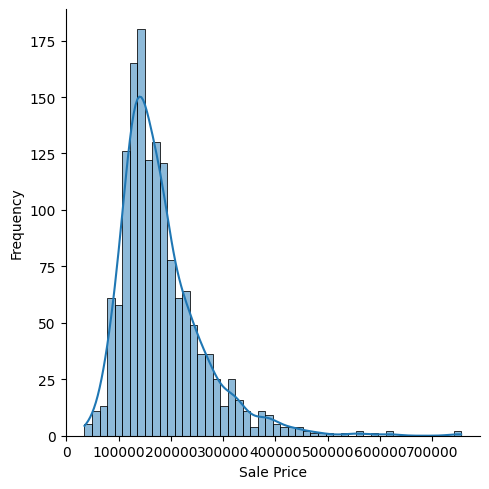

In [73]:
# print historgram of sale prices of training set (data is skewed)
sp = sns.displot(train['SalePrice'], bins = 50, kde = True)
sp.set(xlabel = "Sale Price", ylabel = "Frequency")

In [74]:
# check skewness and kurtosis
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


It is also important to look for outliers that could impact the dataset. In the histogram above, the data is skewed to the right, meaning that there is higher extremes for housing cost.

In [75]:
# check for outliers in the data using IQR
train_sp = train['SalePrice']
Q1 = train_sp.quantile(0.25)
Q3 = train_sp.quantile(0.75)
IQR = Q3-Q1

threshold = 1.5

outliers_mask = ((train_sp < (Q1 - threshold * IQR)) | (train_sp > (Q3 + threshold * IQR)))

outliers_indices = train_sp[outliers_mask].index

print("Indices of outliers:", outliers_indices)

Indices of outliers: Int64Index([  11,   53,   58,  112,  151,  161,  178,  185,  224,  231,  278,
             309,  313,  320,  321,  336,  349,  378,  389,  440,  473,  477,
             481,  496,  515,  527,  585,  591,  608,  642,  644,  654,  661,
             664,  678,  688,  691,  702,  718,  769,  774,  798,  803,  825,
             877,  898,  987,  990, 1046, 1142, 1169, 1181, 1182, 1228, 1243,
            1267, 1268, 1353, 1373, 1388, 1437],
           dtype='int64')


In [76]:
# check the index and value of outliers in training data set
outliers = train_sp.iloc[outliers_indices]
outliers

11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1268    381000
1353    410000
1373    466500
1388    377500
1437    394617
Name: SalePrice, Length: 61, dtype: int64

We can see that outliers indicated can be explained by the skewness of the data as these outliers tend to be housing prices on the higher end of the dataset. There are 61 outliers. As of now, there is no need to remove the outliers within the dataset.

However, we can normalize this data.

<ipython-input-77-1254a2e3c992>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_log['SalePrice'])


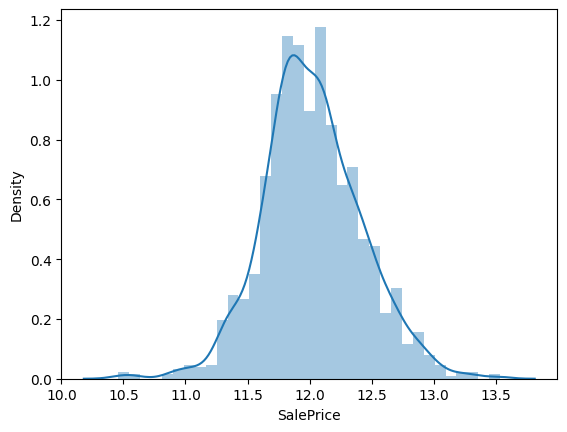

In [77]:
# log transform training dataset to normalize data
train_log = train
train_log['SalePrice'] = np.log(train_log['SalePrice'])

sns.distplot(train_log['SalePrice'])
plt.show()

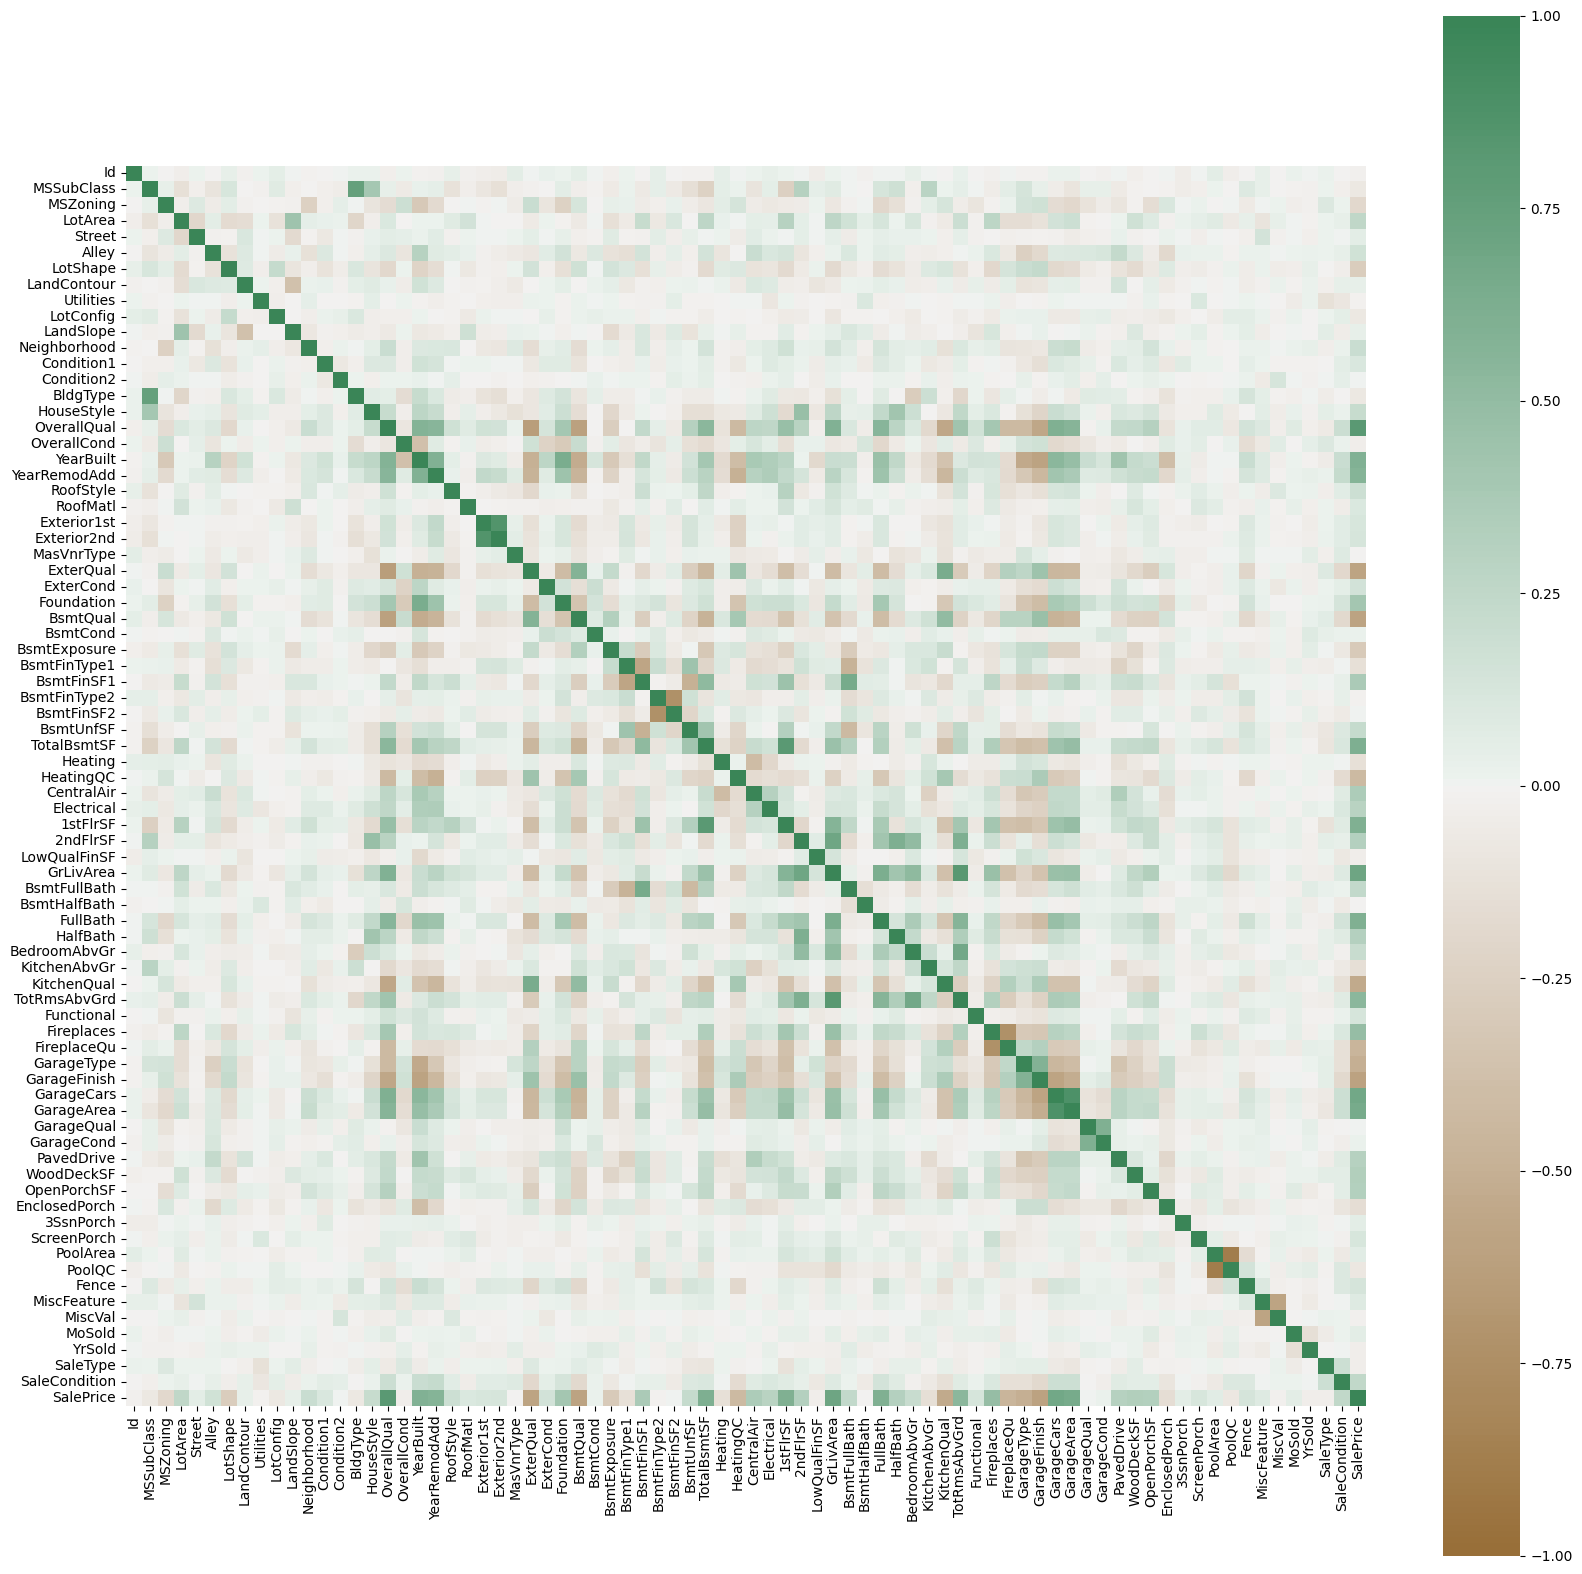

In [78]:
# correlation map of all variables in the training dataset
corrmap = train.corr()
plt.subplots(figsize=(20, 20))
axis_corr = sns.heatmap(corrmap, vmin = -1, vmax = 1 , center = 0, cmap=sns.diverging_palette(50, 500, n=500), square = True)
plt.show()

We can see that SalePrice has a positive correlation with OverallQual, YearBuilt, YearRemodAdd, BsmtQual, etc. To look into which features are important, we can take the absolute values of all the correlation in respect to SalePrice and order them from highest to lowest.

In [79]:
# retrieve the top 15 variables with highest correlation
salescorr = train.corr()['SalePrice']
absalescorr = abs(salescorr)
sort_salescorr = absalescorr.sort_values(ascending = False)
top15 = sort_salescorr.head(16)
print(top15)

SalePrice       1.000000
OverallQual     0.817184
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
GarageFinish    0.604878
1stFlrSF        0.596981
FullBath        0.594771
BsmtQual        0.591290
YearBuilt       0.586570
ExterQual       0.582163
YearRemodAdd    0.565608
TotRmsAbvGrd    0.534422
KitchenQual     0.534386
GarageType      0.503130
Name: SalePrice, dtype: float64


Of the correlation values listed above, only a few variables show that there is a strong correlation between them and SalePrice. Let's take the top 15 varaibles with the highest correlation to be the most important features.

In [80]:
# put the top 15 variables into a list
topfeat = top15.index.tolist()
print(topfeat)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageFinish', '1stFlrSF', 'FullBath', 'BsmtQual', 'YearBuilt', 'ExterQual', 'YearRemodAdd', 'TotRmsAbvGrd', 'KitchenQual', 'GarageType']


In [81]:
# isolate the variables needed from the training dataset
train_top15 = train[topfeat]
train_top15

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,GarageFinish,1stFlrSF,FullBath,BsmtQual,YearBuilt,ExterQual,YearRemodAdd,TotRmsAbvGrd,KitchenQual,GarageType
0,12.247694,7,1710,2,548,856,1,856,2,2,2003,2,2003,8,2,1
1,12.109011,6,1262,2,460,1262,1,1262,2,2,1976,3,1976,6,3,1
2,12.317167,7,1786,2,608,920,1,920,2,2,2001,2,2002,6,2,1
3,11.849398,7,1717,3,642,756,2,961,1,3,1915,3,1970,7,2,5
4,12.429216,8,2198,3,836,1145,1,1145,2,2,2000,2,2000,9,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,12.072541,6,1647,2,460,953,1,953,2,2,1999,3,2000,7,3,1
1456,12.254863,6,2073,2,500,1542,2,2073,2,2,1978,3,1988,7,3,1
1457,12.493130,7,2340,1,252,1152,1,1188,2,3,1941,0,2006,9,2,1
1458,11.864462,5,1078,1,240,1078,2,1078,1,3,1950,3,1996,5,2,1



# Linear Regression Analysis


In [82]:
from sklearn.linear_model import LinearRegression

In [83]:
#  isolate sales price from the training dataset by removing it
del topfeat[0]

In [84]:
print(topfeat)

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'GarageFinish', '1stFlrSF', 'FullBath', 'BsmtQual', 'YearBuilt', 'ExterQual', 'YearRemodAdd', 'TotRmsAbvGrd', 'KitchenQual', 'GarageType']


In [85]:
# sale price as a dependent variable
y_train = train_log['SalePrice']

# get the rest of the top 15 variables for the training and testing dataset
x_train = train_log[topfeat]
x_test = test[topfeat]

In [86]:
# linear regression analysis model
model = LinearRegression()
model.fit(x_train, y_train)
scaled_pred = model.predict(x_test)

In [87]:
# undo the log transform to get the sale prices for the testing dataset
pred = np.exp(scaled_pred)
print(pred)

[117047.27795277 147261.66123931 169544.73441367 ... 140233.32526324
 110809.98420009 237967.30703494]


In [88]:
# exporting the testing dataset id and sales prices for submission
test1 = test
test1['SalePrice'] = pred
df = test1[['Id', 'SalePrice']]
df.to_csv('output_log.csv', index=False)
test = test.drop(['SalePrice'], axis = 1)

Score of 0.16567 on Kaggle (closer to 0 is better)

# Polynomial Regression

In [89]:
from sklearn.preprocessing import PolynomialFeatures

In [90]:
# refreshing the variables again
y_train = train_log['SalePrice']
x_train = train_log[topfeat]
x_test = test[topfeat]

# setting up the polynomial regression model
poly_reg = PolynomialFeatures(degree=2)

# transforming the dataset needed
poly_x_train = poly_reg.fit_transform(x_train)
poly_x_test = poly_reg.transform(x_test)

# running the polynomial regression model
model = LinearRegression()
model.fit(poly_x_train, y_train)

# print out the predicted values
y_pred = model.predict(poly_x_test)

In [91]:
# undo log transform to get sales prices for testing dataset
pred = np.exp(y_pred)

In [92]:
# exporting testing dataset id and sales prices for submission
test2 = test
test2['SalePrice'] = pred
df = test2[['Id', 'SalePrice']]
df.to_csv('output_poly.csv', index=False)
test = test.drop(['SalePrice'], axis = 1)

Score of 0.15201 on Kaggle which is an improvement from Linear Regression.

# Neural Network

In [93]:
# just refreshing the variables
y_train = train_log['SalePrice']
x_train = train_log[topfeat]
x_test = test[topfeat]

In [94]:
# import torch for neural network
import torch
import torch.nn as nn
import torch.optim as optim

In [95]:
# convert dataset into tensors
# had to transform to float due to issues with variable types
y_train = torch.from_numpy(np.array(y_train)).type(torch.float)
x_train = torch.from_numpy(np.array(x_train)).type(torch.float)
x_test = torch.from_numpy(np.array(x_test)).type(torch.float)

In [96]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [97]:
# neural network hyper parameters
input_size = 15 #features
hidden_size = 100 #hidden layer
dim_out = 1 # output
learning_rate = 0.0001 #learning rate

# neural network model
class FeatureNN(nn.Module):
  def __init__(self, input_size, hidden_size, dim_out):
    super().__init__()
    self.layer1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.layer2 = nn.Linear(hidden_size, hidden_size)
    self.relu2 = nn.ReLU()
    self.layer3 = nn.Linear(hidden_size,dim_out)

  def forward(self, x):
    out = self.layer1(x)
    out = self.relu(out)
    out = self.layer2(out)
    out = self.relu(out)
    out = self.layer3(out)
    return out

model = FeatureNN(input_size, hidden_size, dim_out)
criterion = nn.MSELoss() # also tested L1 Loss
opt = optim.Adam(model.parameters(), lr=learning_rate)

In [98]:
epochs = 1000

In [99]:
# training the model
for epoch in range(epochs):
  #Forward pass
  outputs = model(x_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  opt.zero_grad()
  loss.backward()
  opt.step()

  if (epoch + 1) % 100 == 0:
    print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1460])) that is different to the input size (torch.Size([1460, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/1000], Loss: 3.8475
Epoch [200/1000], Loss: 1.9849
Epoch [300/1000], Loss: 1.3638
Epoch [400/1000], Loss: 1.0011
Epoch [500/1000], Loss: 0.7917
Epoch [600/1000], Loss: 0.6488
Epoch [700/1000], Loss: 0.5474
Epoch [800/1000], Loss: 0.4755
Epoch [900/1000], Loss: 0.4313
Epoch [1000/1000], Loss: 0.3966


In [100]:
# model evaluation to get sales prices
model.eval()
with torch.no_grad():
    y_pred_tensor = model(x_test)

# Convert predictions back to NumPy
y_pred = y_pred_tensor.numpy()

# undo log transform to get sales prices
pred = np.exp(y_pred)

In [101]:
print(pred)

[[202286.19]
 [304738.3 ]
 [165830.2 ]
 ...
 [102061.21]
 [191835.66]
 [146192.6 ]]


In [102]:
# exporting testing dataset id and sales prices for submission
test3 = test
test3['SalePrice'] = pred
df = test3[['Id', 'SalePrice']]
df.to_csv('output_nn.csv', index=False)
test = test.drop(['SalePrice'], axis = 1)

First neural network score a 2.10037 which yield poor results considering the two linear regression done above. After adding a few more layers, including dropout, and using MSELoss instead of Adam, score is now at 0.53099 which is a huge improvement.